In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('coffee.csv')

In [6]:
summary_df = df.groupby(['product_category', 'product_type'], as_index=False)['transaction_qty'].sum()
summary_df.rename(columns={'transaction_qty': 'total_order'}, inplace=True)
summary_df

,product_category,product_type,total_order
0,Bakery,Biscotti,5788
1,Bakery,Pastry,6961
2,Bakery,Scone,10465
3,Branded,Clothing,221
4,Branded,Housewares,555
5,Coffee,Barista Espresso,24943
6,Coffee,Drip coffee,12891
7,Coffee,Gourmet brewed coffee,25973
8,Coffee,Organic brewed coffee,13012
9,Coffee,Premium brewed coffee,12431


IndexError: tuple index out of range

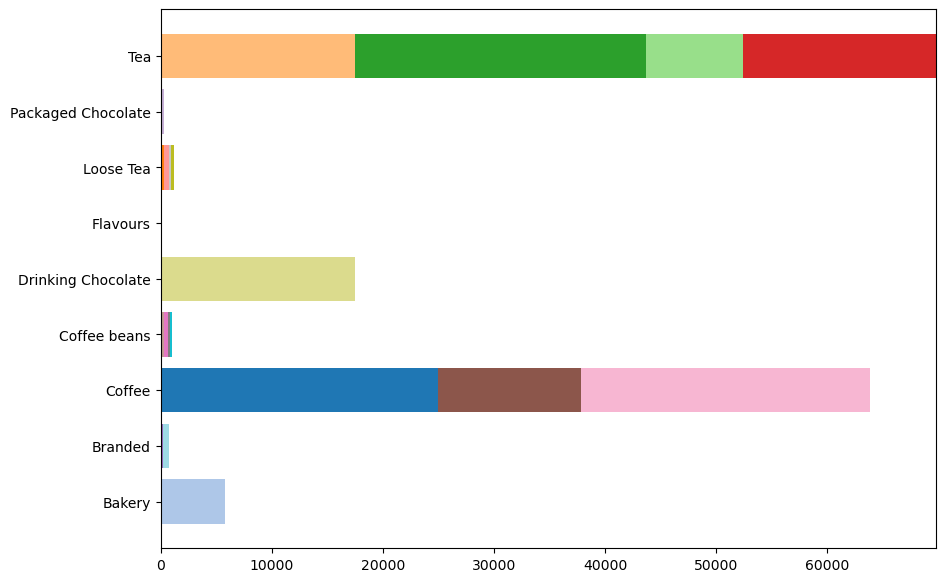

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the DataFrame
pivot_df = summary_df.pivot_table(index='product_category', columns='product_type', values='total_order', fill_value=0)

# Set up the figure and axes
plt.figure(figsize=(10, 7))

# Plot each product type as a stack
colors = plt.cm.tab20.colors  # Choose a color palette
bottoms = [0] * len(pivot_df)

for i, product_type in enumerate(pivot_df.columns):
    plt.barh(pivot_df.index, pivot_df[product_type], left=bottoms, color=colors[i], label=product_type)
    bottoms = [sum(x) for x in zip(bottoms, pivot_df[product_type])]

# Add labels and title
plt.ylabel('Product Category')
plt.xlabel('Total Orders')
plt.title('Total Orders by Product Category and Type')
plt.legend(title='Product Type')

# Show the plot
plt.show()